In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("IRIS_ Flower_Dataset.csv")

In [3]:
print(df.describe())
print(df)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ..

Text(0, 0.5, 'petal_width')

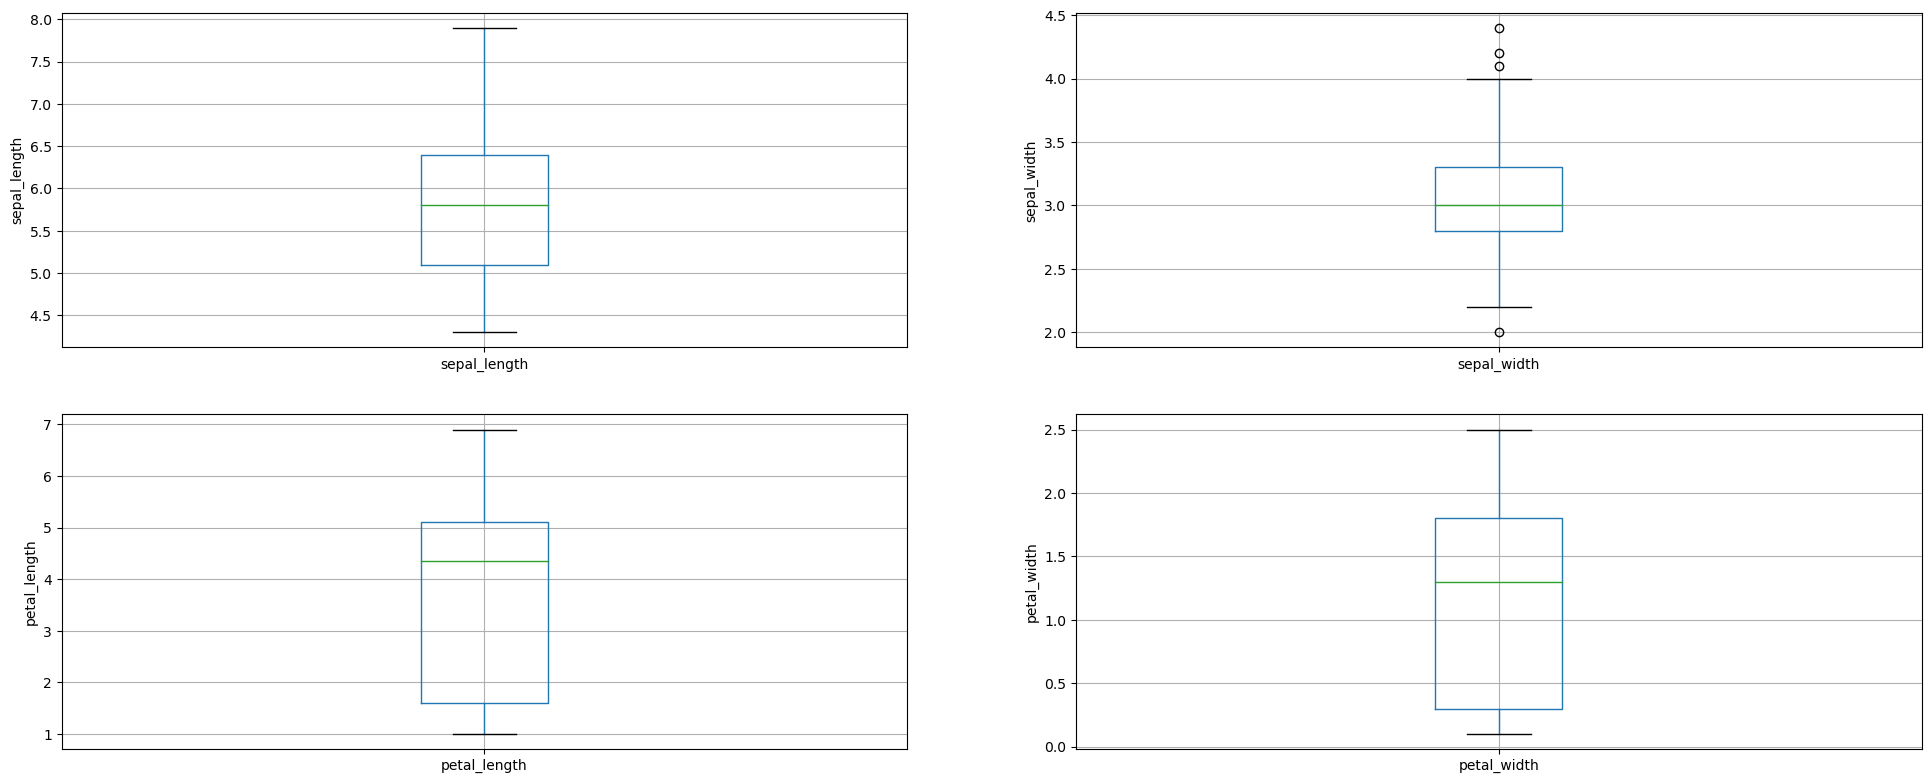

In [4]:
#Checking for potential outliers
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='sepal_length')
fig.set_title('')
fig.set_ylabel('sepal_length')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='sepal_width')
fig.set_title('')
fig.set_ylabel('sepal_width')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='petal_length')
fig.set_title('')
fig.set_ylabel('petal_length')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='petal_width')
fig.set_title('')
fig.set_ylabel('petal_width')

# We don't have a lot of outliers

In [5]:
#Creating the two parts

X = df.drop(['species'], axis=1)
y = df['species']

In [6]:
#Separating into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
svcflow=SVC()

#First model with default parameters

svcflow.fit(X_train,y_train)
y_pred=svcflow.predict(X_test)

print((accuracy_score(y_test, y_pred)))

0.9736842105263158


0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']
0.9736842105263158


<Axes: >

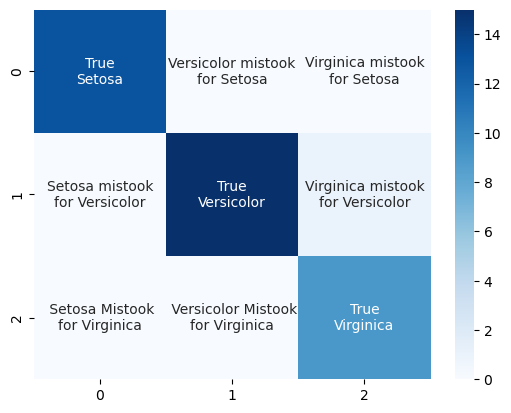

In [21]:
#So we got a great accuracy of 97% ! But, can we make it even better ? Let's mess with C to find out ! 
svcflow=SVC(C=100)

#Second model with C=100

svcflow.fit(X_train,y_train)
y_pred=svcflow.predict(X_test)

y_predict = svcflow.predict(X_test)
print(svcflow.score(X_test, y_test))
cf_matrix = confusion_matrix(y_test, y_predict)
print (cf_matrix)
labels = ["True\nSetosa", "Versicolor mistook\nfor Setosa", "Virginica mistook\nfor Setosa", "Setosa mistook\nfor Versicolor", "True\nVersicolor","Virginica mistook\nfor Versicolor"," Setosa Mistook\nfor Virginica", " Versicolor Mistook\nfor Virginica","True\nVirginica"]
print(y_predict)
labels = np.asarray(labels).reshape(3,3)

print((accuracy_score(y_test, y_pred)))
sns.heatmap(cf_matrix, annot = labels, fmt = "", cmap = "Blues")

In [9]:
#We got the same result... Let's try with an even increased C to be sure, but seems like we won't be able to increase our accuracy with that. 
svcflow=SVC(C=1000)

#Third model with C=1000

svcflow.fit(X_train,y_train)
y_pred=svcflow.predict(X_test)

print((accuracy_score(y_test, y_pred)))

0.9473684210526315


In [14]:
#That was a bad idea, the accuracy decreased... Let's try something else ! We'll try with a linear kernel
svcflow=SVC(kernel='linear') 

#Third model with C=100

svcflow.fit(X_train,y_train)
y_pred=svcflow.predict(X_test)

print((accuracy_score(y_test, y_pred)))

0.9736842105263158


In [15]:
#It doesn't seems to change... We'll change C just to be sure we can't improve it.
svcflow=SVC(kernel='linear', C=100) 

#Third model with linear kernel and default C

svcflow.fit(X_train,y_train)
y_pred=svcflow.predict(X_test)

print((accuracy_score(y_test, y_pred)))

0.9473684210526315


In [12]:
#Nope, decreasing ಥ_ಥ . Well, we already have a 97% accuracy, that's great ! ♪♪ ヽ(ˇ∀ˇ )ゞ 
#Now, we'll just see if the accuracy is the same if we're trying our programm on the train dataset

svcflow=SVC()

svcflow.fit(X_train,y_train)
y_pred=svcflow.predict(X_train)

print((accuracy_score(y_train, y_pred)))

0.9642857142857143


In [23]:
#YEAH ! It's basically the same, so we're good ! Now, we just save the model
save_dir = 'models/'
filename = 'Flower.pt' #.pt,.pth, .ckpt

pickle.dump(svcflow, open(filename, 'wb'))